In [1]:
import matplotlib.pyplot
from pyomo.environ import *
from util.util import get_root_dir
import pandas as pd
import numpy as np
from ordered_set import OrderedSet

In [2]:
proj_dir = get_root_dir() + "/superstructure/"
# data_dir = proj_dir + "plastic_case/"

In [3]:
df = pd.read_csv("data/productive.csv", index_col=0)
df

,R1A,R2A,R3A,DT1A,DT2A,DT3A,DT4A,FEED-LDPE,FEED-HDPE,FEED-PP,FEED-H2,PROD-WASTE,PROD-ELEC,PROD-GAS,PROD-JTF,PROD-DSL,PROD-WAX
R1A-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
R2A-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
R3A-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
DT1A-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
DT2A-1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
DT3A-1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
DT4A-1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
FEED-LDPE,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FEED-HDPE,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FEED-PP,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
productive_links = []
for index, row in df.iterrows():
    for column in df.columns:
        if row[column] == 1:
            productive_links.append((index, column))


productive_links

[('R1A-1', 'DT1A'),
 ('R2A-1', 'DT1A'),
 ('R3A-1', 'DT1A'),
 ('DT1A-1', 'PROD-ELEC'),
 ('DT2A-1', 'PROD-ELEC'),
 ('DT2A-1', 'PROD-GAS'),
 ('DT2A-1', 'PROD-JTF'),
 ('DT3A-1', 'PROD-ELEC'),
 ('DT3A-1', 'PROD-GAS'),
 ('DT3A-1', 'PROD-JTF'),
 ('DT3A-1', 'PROD-DSL'),
 ('DT4A-1', 'PROD-ELEC'),
 ('DT4A-1', 'PROD-GAS'),
 ('DT4A-1', 'PROD-JTF'),
 ('DT4A-1', 'PROD-DSL'),
 ('FEED-LDPE', 'R1A'),
 ('FEED-HDPE', 'R2A'),
 ('FEED-PP', 'R3A'),
 ('FEED-H2', 'R1A'),
 ('FEED-H2', 'R2A'),
 ('FEED-H2', 'R3A'),
 ('R1A-2', 'PROD-WASTE'),
 ('R2A-2', 'PROD-WASTE'),
 ('R3A-2', 'PROD-WASTE'),
 ('DT1A-2', 'DT2A'),
 ('DT1A-2', 'PROD-ELEC'),
 ('DT1A-2', 'PROD-GAS'),
 ('DT1A-2', 'PROD-JTF'),
 ('DT1A-2', 'PROD-DSL'),
 ('DT2A-2', 'DT3A'),
 ('DT2A-2', 'PROD-ELEC'),
 ('DT2A-2', 'PROD-GAS'),
 ('DT2A-2', 'PROD-JTF'),
 ('DT2A-2', 'PROD-DSL'),
 ('DT3A-2', 'DT4A'),
 ('DT3A-2', 'PROD-ELEC'),
 ('DT3A-2', 'PROD-JTF'),
 ('DT3A-2', 'PROD-DSL'),
 ('DT4A-2', 'PROD-ELEC'),
 ('DT4A-2', 'PROD-WAX')]

In [5]:
conversions = {}
conversions["R1A"] = {}
conversions["R2A"] = {}
conversions["R3A"] = {}
df_R1A = pd.read_excel("data/reaction_data.xlsx", sheet_name="R1A", header=0)
df_R2A = pd.read_excel("data/reaction_data.xlsx", sheet_name="R2A", header=0)
df_R3A = pd.read_excel("data/reaction_data.xlsx", sheet_name="R3A", header=0)

for index, row in df_R1A.iterrows():
    if not row["Code"] in {"Waste", "WASTE", "waste"}:
        conversions["R1A"][row["Code"]] = row["Yield"]

for index, row in df_R2A.iterrows():
    if not row["Code"] in {"Waste", "WASTE", "waste"}:
        conversions["R2A"][row["Code"]] = row["Yield"]

for index, row in df_R3A.iterrows():
    if not row["Code"] in {"Waste", "WASTE", "waste"}:
        conversions["R3A"][row["Code"]] = row["Yield"]

conversions;

In [6]:
properties = pd.read_csv("filled_properties.csv", index_col=0)

In [7]:
def prepare_sets():
    res = {}
    elements = pd.read_csv("data/elements_case1.csv", index_col=0)
    res["i"] = elements.index.tolist()

    compounds = [f'C{n}A' for n in range(1, 23)] + ['H2', 'LDPE', 'HDPE', 'PP', 'WASTE']
    res["k"] =  compounds

    return res

In [8]:
res = prepare_sets()
res["i"];

In [9]:
def build_model(m, data):
    m.i = Set(initialize=data["i"])
    m.itech = Set(within=m.i, initialize=["R1A", "R2A", "R3A", "DT1A", "DT2A", "DT3A", "DT4A"])

    m.isource = Set(within=m.i, initialize=["FEED-LDPE", "FEED-HDPE", "FEED-PP", "FEED-H2","R1A", "R2A", "R3A", "DT1A", "DT2A", "DT3A", "DT4A"])
    m.isink = Set(within=m.i, initialize=["R1A-1", "R2A-1", "R3A-1", "DT1A-1", "DT2A-1", "DT3A-1", "DT4A-1","R1A-2", "R2A-2", "R3A-2", "DT1A-2",
                                          "DT2A-2", "DT3A-2", "DT4A-2","PROD-WASTE","PROD-ELEC","PROD-GAS","PROD-JTF","PROD-DSL", "PROD-WAX"])

    irxn = ["R1A", "R2A", "R3A"]
    isep = ["DT1A", "DT2A", "DT3A", "DT4A"]

    m.irxn = Set(within=m.itech, initialize=irxn)
    m.isep = Set(within=m.itech, initialize=isep)

    irxnL = ["R1A-1", "R2A-1", "R3A-1"]
    isepL = ["DT1A-1", "DT2A-1", "DT3A-1", "DT4A-1"]
    irxnH = ["R1A-2", "R2A-2", "R3A-2"]
    isepH = ["DT1A-2", "DT2A-2", "DT3A-2", "DT4A-2"]

    m.irxnL = Set(within=m.i, initialize=irxnL)
    m.isepL = Set(within=m.i, initialize=isepL)
    m.irxnH = Set(within=m.i, initialize=irxnH)
    m.isepH = Set(within=m.i, initialize=isepH)

    m.ifeed = Set(within=m.i, initialize=["FEED-LDPE", "FEED-HDPE", "FEED-PP", "FEED-H2"])
    m.iprod = Set(within=m.i, initialize=["PROD-WASTE", "PROD-ELEC","PROD-GAS","PROD-JTF","PROD-DSL", "PROD-WAX"])
    m.ifuel = Set(within=m.iprod, initialize=["PROD-GAS","PROD-JTF","PROD-DSL"])

    m.k = Set(initialize=data["k"])
    m.kfeed = Set(within=m.k, initialize=["LDPE","HDPE","PP","H2"])
    kfuel = [key for key, value in properties["trace"].to_dict().items() if value == 0]
    m.kfuel = Set(within=m.k, initialize=kfuel)
    kegen = [key for key, value in properties["egen"].to_dict().items() if value == 1]
    m.kegen = Set(within=m.k, initialize = kegen)

    m.productive_links = Set(dimen=2, within=m.i * m.i, initialize = productive_links)

    port_match = {}
    for item in irxnL + isepL + irxnH + isepH:
        base, suffix = item.rsplit('-', 1)
        match_suffix = '2' if suffix == '1' else '1'
        port_match[item] = f"{base}-{match_suffix}"

    heavy_match = {}

    # Map -2 to no suffix
    for item in irxnH + isepH:
        base, _ = item.rsplit('-', 1)
        heavy_match[item] = f"{base}"

    # Map no suffix to -2
    for item in irxn + isep:
        heavy_match[item] = f"{item}-2"

    light_match = {}

    # Map -1 to no suffix
    for item in irxnL + isepL:
        base, _ = item.rsplit('-', 1)
        light_match[item] = base

    # Map no suffix to -1
    for item in irxn + isep:
        light_match[item] = f"{item}-1"

    m.port_match = port_match # match xxx-1  and xxx-2: that is, m.port_match[xxx-1] gives xxx-2 and vice versa
    m.heavy_match = heavy_match
    m.light_match = light_match

    m.inlets = {}
    m.outlets = {}

    for i in m.i:
        m.inlets[i] = OrderedSet()
        m.outlets[i] = OrderedSet()

    for (a,b) in productive_links:
        m.inlets[b].append(a)
        m.outlets[a].append(b)

    m.rxn_species = {}
    hdc_list = [f'C{n}A' for n in range(1, 20)]
    hdc_list.append("H2")
    r1a_list = [i for i in hdc_list]
    r1a_list.append("LDPE")
    m.rxn_species["R1A"] =  OrderedSet(r1a_list)

    r2a_list = [i for i in hdc_list]
    r2a_list.append("HDPE")
    m.rxn_species["R2A"] =  OrderedSet(r2a_list)

    r3a_list = [i for i in hdc_list]
    r3a_list.append("PP")
    m.rxn_species["R3A"] =  OrderedSet(r3a_list)

    m.conversions = conversions

    # ============================================

    m.fload = Param(m.kfeed, initialize={"LDPE": 20000, "HDPE":80000, "PP":96000})

    m.MW = Param(m.k, initialize=properties["MW"].to_dict())

    m.LHV = Param(m.kegen, initialize={kp : properties["LHV"].to_dict()[kp] for kp in m.kegen})
    m.rho = Param(m.kfuel, initialize={kp : properties["rho"].to_dict()[kp] for kp in m.kfuel})
    m.mu = Param(m.kfuel, initialize={kp :properties["mu"].to_dict()[kp] for kp in m.kfuel})
    m.TB = Param(m.k, initialize=properties["TB"].to_dict())
    m.bpLo = Param(m.ifuel, initialize={"PROD-GAS": 5, "PROD-JTF": 5, "PROD-DSL": 5} )
    m.bpUp = Param(m.ifuel, initialize={"PROD-GAS": 98,"PROD-JTF": 98.5,"PROD-DSL": 95} )

    m.sepCut = Param(m.isep, initialize={"DT1A": np.ceil(m.TB["C4A"]), "DT2A": np.ceil(m.TB["C8A"]), "DT3A": np.ceil(m.TB["C12A"]), "DT4A": np.ceil(m.TB["C20A"])})
    # C4/C5; C8/C9; C12/C13;C20/C21

    m.mat_price = Param(m.ifeed, initialize={"FEED-LDPE": 200, "FEED-HDPE": 200, "FEED-PP": 200, "FEED-H2":2100}, doc="$/per tonne")
    m.fuel_price = Param(m.ifuel, initialize={"PROD-GAS": 810,"PROD-JTF": 663,"PROD-DSL":975}, doc="$/per tonne")
    m.electric_price = Param(initialize=2.221e-8, doc="/J")

    # ============================================

    m.F = Var(m.productive_links, m.k,domain=NonNegativeReals)
    m.FRefT = Var(m.irxn, domain=NonNegativeReals)
    m.FI = Var(m.itech, m.k, domain=NonNegativeReals)

    m.capex = Var(domain=NonNegativeReals)
    m.opex = Var(domain=NonNegativeReals)
    m.cc = Var(m.itech, domain=NonNegativeReals)
    m.oc = Var(m.itech, domain=NonNegativeReals)
    m.feedCost = Var(m.ifeed, domain=NonNegativeReals)
    m.revenue = Var(m.iprod, domain=NonNegativeReals)

In [10]:
def build_feed_cons(m):
    # Load constriants for feed
    def eq_fd1(m ,kfeed):
        if kfeed == "LDPE":
            return  sum(m.F["FEED-LDPE",i, kfeed] for i in m.outlets["FEED-LDPE"]) == m.fload[kfeed]
        elif kfeed == "HDPE":
            return  sum(m.F["FEED-HDPE",i, kfeed] for i in m.outlets["FEED-HDPE"]) == m.fload[kfeed]
        elif kfeed == "PP":
            return  sum(m.F["FEED-PP",i, kfeed] for i in m.outlets["FEED-PP"])== m.fload[kfeed]
        return Constraint.Skip
    m.eq_fd1 = Constraint(m.kfeed, rule=eq_fd1)

    # pure feed only
    def eq_fd2(m, kfeed):
        if kfeed == "LDPE":
            return  sum(m.F["FEED-LDPE","R1A",k] for k in m.k if k != "LDPE") == 0
        elif kfeed == "HDPE":
            return  sum(m.F["FEED-HDPE","R2A",k] for k in m.k if k != "HDPE") == 0
        elif kfeed == "PP":
            return  sum(m.F["FEED-PP","R3A",k] for k in m.k if k != "PP") == 0
        elif kfeed == "H2":
            return  sum(m.F["FEED-H2","R1A",k] + m.F["FEED-H2","R2A",k] + m.F["FEED-H2","R3A",k] for k in m.k if k != "H2" ) == 0
        return Constraint.Skip
    m.eq_fd2 = Constraint(m.kfeed, rule=eq_fd2)
    return


In [11]:
def build_rxn(m):
    # find the basis of yield
    def eq_rxn1(m, irxn):
        if irxn == "R1A":
            return m.FRefT[irxn] == sum(m.F[ip ,irxn, "LDPE"] for ip in m.inlets[irxn])
        elif irxn == "R2A":
            return m.FRefT[irxn] == sum(m.F[ip ,irxn, "HDPE"] for ip in m.inlets[irxn])
        elif irxn == "R3A":
            return m.FRefT[irxn] == sum(m.F[ip ,irxn, "PP"] for ip in m.inlets[irxn])
        return Constraint.Skip
    m.eq_rxn1 = Constraint(m.irxn, rule=eq_rxn1)

    # conversion
    def eq_rxn2(m, irxn, k):
        if k in m.rxn_species[irxn]:
            return sum(m.F[ip, irxn, k] for ip in m.inlets[irxn]) + m.conversions[irxn][k] * m.FRefT[irxn] == m.FI[irxn,k]
        return Constraint.Skip
    m.eq_rxn2 = Constraint(m.irxn, m.k, rule=eq_rxn2)

    # other species
    def eq_rxn3(m, irxn, k):
        if (not k in m.rxn_species[irxn]) and (not k == "WASTE"):
            return sum(m.F[ip, irxn, k] for ip in m.inlets[irxn]) == m.FI[irxn,k]
        return Constraint.Skip
    m.eq_rxn3 = Constraint(m.irxn, m.k, rule=eq_rxn3)

    # waste DOF, mass balance
    def eq_rxn4(m, irxn):
        return sum(sum(m.F[ip, irxn, k] for ip in m.inlets[irxn]) for k in m.k) == sum(m.FI[irxn,k] for k in m.k)
    m.eq_rxn4 = Constraint(m.irxn, rule=eq_rxn4)

    # Going out of the technology
    # waste and only waste goes to waste stream
    def eq_rxn5(m, irxnH, k):
        if k == "WASTE":
            return m.FI[m.heavy_match[irxnH],k] == m.F[irxnH,"PROD-WASTE",k]
        return m.F[irxnH, "PROD-WASTE", k] == 0
    m.eq_rxn5 = Constraint(m.irxnH, m.k, rule=eq_rxn5)

    # outgoing port balance
    def eq_rxn6(m, irxnH, k):
        return m.FI[m.heavy_match[irxnH],k] == sum(m.F[irxnH,ip,k] for ip in m.outlets[irxnH]) + sum(m.F[m.port_match[irxnH], ip,k] for ip in m.outlets[m.port_match[irxnH]])
    m.eq_rxn6 = Constraint(m.irxnH, m.k, rule=eq_rxn6)

    # saturation constriant for HDC
    def eq_rxn7a(m, irxn):
        return sum(m.F[ip ,irxn,"H2"] for ip in m.inlets[irxn]) >= 2 * m.FI[irxn, "H2"]
    m.eq_rxn7a = Constraint(m.irxn, rule=eq_rxn7a)

    return

In [12]:
def build_separation(m):
    # Sharp binary separation
    def eq_sep1(m, isep, k):
        if m.TB[k] <= m.sepCut[isep]:
            return sum(m.F[ip, isep, k] for ip in m.inlets[isep]) == sum(m.F[m.light_match[isep],ip,k] for ip in m.outlets[m.light_match[isep]])
        return sum(m.F[ip, isep, k] for ip in m.inlets[isep]) == sum(m.F[m.heavy_match[isep],ip,k] for ip in m.outlets[m.heavy_match[isep]])
    m.eq_sep1 = Constraint(m.isep, m.k, rule=eq_sep1)

    def _MB(m, isep, k):
        return sum(m.F[i,isep, k] for i in m.inlets[isep]) == sum(m.F[m.heavy_match[isep], i, k] for i in m.outlets[m.heavy_match[isep]]) + sum(m.F[m.light_match[isep], i, k] for i in m.outlets[m.light_match[isep]])
    m.connect_c = Constraint(m.isep, m.k, rule=_MB)

    return

In [13]:
def blending(m):
    # blending constraints
    def trace_lim(m, ifuel):
        return sum(sum(m.F[ip, ifuel, k] for k in m.k if not k in m.kfuel) for ip in m.inlets[ifuel]) <= 0.01 * sum(sum(m.F[ip, ifuel, k] for k in m.k) for ip in m.inlets[ifuel])
    m.trace_lim = Constraint(m.iprod, rule=trace_lim)

    def _BPlo(m, ifuel):
        if ifuel == "PROD-GAS":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 30) for ip in m.inlets[ifuel]) <= m.bpLo[ifuel]
        elif ifuel == "PROD-JTF":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 160) for ip in m.inlets[ifuel]) <= m.bpLo[ifuel]
        elif ifuel == "PROD-DSL":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 150) for ip in m.inlets[ifuel]) <= m.bpLo[ifuel]
        return Constraint.Skip
    m.fuel_bplo = Constraint(m.ifuel, rule=_BPlo)

    def _BPup(m, ifuel):
        if ifuel == "PROD-GAS":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 215) for ip in m.inlets[ifuel]) >= m.bpUp[ifuel]
        elif ifuel == "PROD-JTF":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 300) for ip in m.inlets[ifuel]) >= m.bpUp[ifuel]
        elif ifuel == "PROD-DSL":
            return sum(sum(m.F[ip, ifuel, k] for k in m.k if m.TB[k] <= 360) for ip in m.inlets[ifuel]) >= m.bpUp[ifuel]
        return Constraint.Skip
    m.fuel_bpup = Constraint(m.ifuel, rule=_BPup)

In [14]:
def economics(m):
    # economics
    def fuel_revenue(m, ifuel):
        return m.revenue[ifuel] == m.fuel_price[ifuel] * sum(sum(m.F[i, ifuel, k] for k in m.k) for i in m.inlets[ifuel])
    m.fuel_revenue = Constraint(m.ifuel, rule=fuel_revenue)

    def mat_cost(m, ifeed):
        return m.feedCost[ifeed] == m.mat_price[ifeed] * sum(sum(m.F[ifeed,i, k] for k in m.k) for i in m.outlets[ifeed])
    m.mat_cost = Constraint(m.ifeed, rule=mat_cost)



In [15]:
m1 = ConcreteModel()
build_model(m1, res)
build_feed_cons(m1)
build_rxn(m1)
build_separation(m1)
blending(m1)
economics(m1)

default domain for Param objects is 'Any'.  However, we will be changing that
default to 'Reals' in the future.  If you really intend the domain of this
Paramto be 'Any', you can suppress this warning by explicitly specifying
'within=Any' to the Param constructor. (deprecated in 5.6.9, will be removed
in (or after) 6.0) (called from
C:\Users\justi\anaconda3\envs\optimization\lib\site-
packages\pyomo\core\base\indexed_component.py:716)
The default domain for Param objects is 'Any'.  However, we will be changing
that default to 'Reals' in the future.  If you really intend the domain of
this Paramto be 'Any', you can suppress this warning by explicitly specifying
'within=Any' to the Param constructor. (deprecated in 5.6.9, will be removed
in (or after) 6.0) (called from
C:\Users\justi\anaconda3\envs\optimization\lib\site-
packages\pyomo\core\base\indexed_component.py:716)
default domain for Param objects is 'Any'.  However, we will be changing that
default to 'Reals' in the future.  If yo

In [16]:
def solve_model(m):
    m.obj = Objective(expr=sum(m.feedCost[ifeed] for ifeed in m.ifeed)
                           - sum(m.revenue[ifuel] for ifuel in m.ifuel), sense=minimize)

    # def cdebug(m, ifuel):
    #     return sum(sum(m.F[i, ifuel, k] for k in m.k) for i in m.inlets[ifuel]) <= 9000000
    # m.cd = Constraint(m.ifuel, rule=cdebug)

    #opt2 = SolverFactory('gurobi_persistent')
    opt1 = SolverFactory('gams')
    io_options = dict()

    io_options['solver'] = "cplex"
    res = opt1.solve(m,
        tee=True,
        add_options = ['option reslim=1000; option optcr=0.0;'],
        io_options=io_options)

    return res

solve_model(m1)

--- Job model.gms Start 12/08/23 10:39:20 43.2.0 859d62d5 WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\43\gmsprmNT.txt
    C:\Users\justi\OneDrive\Documents\GAMS\gamsconfig.yaml
--- GAMS Parameters defined
    Input C:\Users\justi\AppData\Local\Temp\tmp4bmpx4wu\model.gms
    Output C:\Users\justi\AppData\Local\Temp\tmp4bmpx4wu\output.lst
    ScrDir C:\Users\justi\AppData\Local\Temp\tmp4bmpx4wu\225a\
    SysDir C:\GAMS\43\
    CurDir C:\Users\justi\AppData\Local\Temp\tmp4bmpx4wu\
    LogOption 3
Licensee: Small MUD - 5 User License                     G221121|0002AP-GEN
          University of Delaware, Chemical and Biomolecular EngineeriDC3967
          C:\GAMS\43\gamslice.txt
          License Admin: Marianthi Ierapetritou, mgi@udel.edu              
Processor information: 1 socket(s), 10 core(s), and 20 thread(s) available
GAMS 43.2.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- model.gms(3900) 2 Mb
--- Starting execution: ela

{'Problem': [{'Name': 'C:\\Users\\justi\\AppData\\Local\\Temp\\tmp4bmpx4wu\\model.gms', 'Lower bound': nan, 'Upper bound': -89398284.31776011, 'Number of objectives': 1, 'Number of constraints': 492.0, 'Number of variables': 1172.0, 'Number of binary variables': None, 'Number of integer variables': 0.0, 'Number of continuous variables': 1172.0, 'Number of nonzeros': 4399.0, 'Sense': 'minimize'}], 'Solver': [{'Name': 'GAMS (43, 2, 0, 0)', 'Status': 'ok', 'Return code': 0, 'Message': None, 'User time': 0.020000268705189, 'System time': None, 'Wallclock time': None, 'Termination condition': 'optimal', 'Termination message': None}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [21]:
productive_links

[('R1A-1', 'DT1A'),
 ('R2A-1', 'DT1A'),
 ('R3A-1', 'DT1A'),
 ('DT1A-1', 'PROD-ELEC'),
 ('DT2A-1', 'PROD-ELEC'),
 ('DT2A-1', 'PROD-GAS'),
 ('DT2A-1', 'PROD-JTF'),
 ('DT3A-1', 'PROD-ELEC'),
 ('DT3A-1', 'PROD-GAS'),
 ('DT3A-1', 'PROD-JTF'),
 ('DT3A-1', 'PROD-DSL'),
 ('DT4A-1', 'PROD-ELEC'),
 ('DT4A-1', 'PROD-GAS'),
 ('DT4A-1', 'PROD-JTF'),
 ('DT4A-1', 'PROD-DSL'),
 ('FEED-LDPE', 'R1A'),
 ('FEED-HDPE', 'R2A'),
 ('FEED-PP', 'R3A'),
 ('FEED-H2', 'R1A'),
 ('FEED-H2', 'R2A'),
 ('FEED-H2', 'R3A'),
 ('R1A-2', 'PROD-WASTE'),
 ('R2A-2', 'PROD-WASTE'),
 ('R3A-2', 'PROD-WASTE'),
 ('DT1A-2', 'DT2A'),
 ('DT1A-2', 'PROD-ELEC'),
 ('DT1A-2', 'PROD-GAS'),
 ('DT1A-2', 'PROD-JTF'),
 ('DT1A-2', 'PROD-DSL'),
 ('DT2A-2', 'DT3A'),
 ('DT2A-2', 'PROD-ELEC'),
 ('DT2A-2', 'PROD-GAS'),
 ('DT2A-2', 'PROD-JTF'),
 ('DT2A-2', 'PROD-DSL'),
 ('DT3A-2', 'DT4A'),
 ('DT3A-2', 'PROD-ELEC'),
 ('DT3A-2', 'PROD-JTF'),
 ('DT3A-2', 'PROD-DSL'),
 ('DT4A-2', 'PROD-ELEC'),
 ('DT4A-2', 'PROD-WAX')]

In [22]:
m1.inlets["DT2A"]

OrderedSet(['DT1A-2'])

In [33]:
res =  {iprod: value(sum(sum(m1.F[i, iprod, k] for k in m1.k) for i in m1.inlets[iprod])) for iprod in m1.iprod }
res

{'PROD-WASTE': 27461.151117515983,
 'PROD-ELEC': 17040.261424152,
 'PROD-GAS': 91527.68688584,
 'PROD-JTF': 98.5,
 'PROD-DSL': 63410.21223289199,
 'PROD-WAX': 0.0}

<BarContainer object of 6 artists>

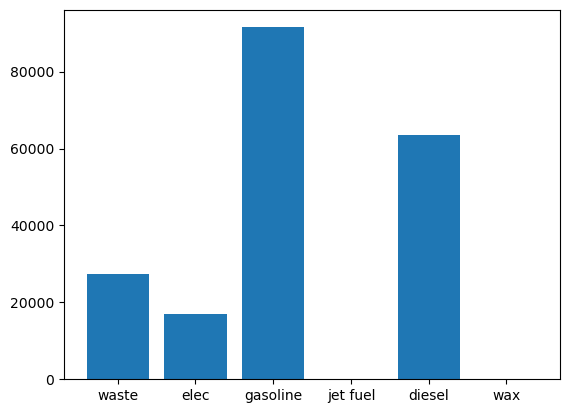

In [35]:
import matplotlib.pyplot as plt
plt.bar(["waste", "elec", "gasoline", "jet fuel", "diesel", "wax"], list(res.values()))

<BarContainer object of 4 artists>

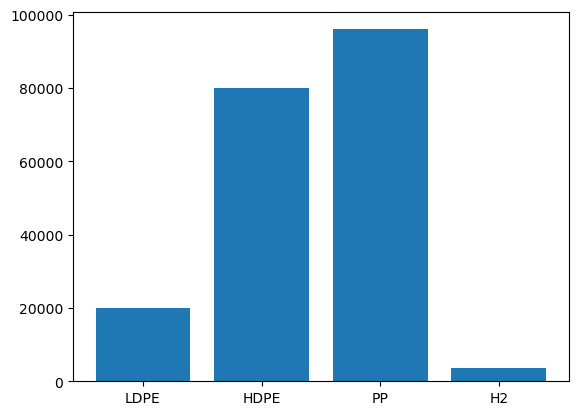

In [41]:
feedstock =  {ifeed: value(sum(sum(m1.F[ifeed, i, k] for k in m1.k) for i in m1.outlets[ifeed])) for ifeed in m1.ifeed}
feedstock
import matplotlib.pyplot as plt
plt.bar(["LDPE", "HDPE", "PP", "H2"], list(feedstock.values()))

<BarContainer object of 3 artists>

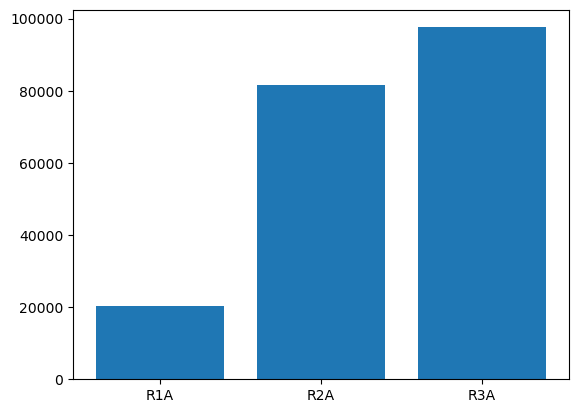

In [42]:
rxns =  {irxn: value(sum(m1.FI[irxn, k] for k in m1.k)) for irxn in m1.irxn}
rxns
import matplotlib.pyplot as plt
plt.bar(["R1A", "R2A", "R3A"], list(rxns.values()))